In [2]:
import json
import requests
from typing import List, Dict
from PIL import Image, ImageDraw

#### Config

In [4]:
SECRETS_PATH = "../secrets/secrets.json"

with open(SECRETS_PATH) as secret_file:
  SECRETS = json.loads(secret_file.read())
  
HEADERS = {"Authorization": f"Bearer {SECRETS['fun_api_token']}"}

#### Utils

In [5]:
def request_hf_api_inference(file_name:str,  model_name:str)  -> List[Dict[str, str | Dict]]:
    
    api_url = f"https://api-inference.huggingface.co/models/{model_name}"
    
    with open(file_name, "rb") as f:
        data = f.read()
    response = requests.request("POST", api_url, headers=HEADERS, data=data)
    
    return json.loads(response.content.decode("utf-8"))

#### Image classification

In [6]:
def classify_image(file_name:str, model_name:str="google/vit-base-patch16-224") -> List[Dict[str, str]]:
    
    return request_hf_api_inference(file_name, model_name)

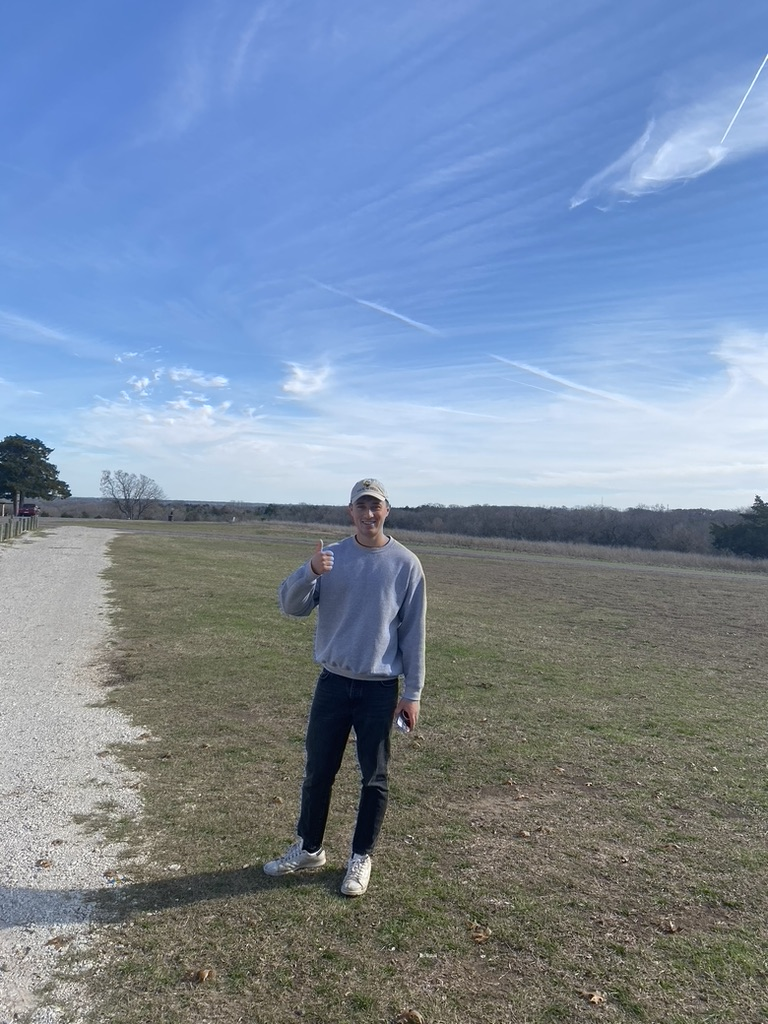

In [9]:
image_path = "../data/images/chris.jpeg"
image = Image.open(image_path)
image

In [10]:
classify_image(image_path)

[{'score': 0.2839241921901703, 'label': 'ballplayer, baseball player'},
 {'score': 0.2027432769536972, 'label': 'soccer ball'},
 {'score': 0.029488228261470795, 'label': 'baseball'},
 {'score': 0.02760656550526619, 'label': 'balloon'},
 {'score': 0.02250542864203453, 'label': 'rugby ball'}]

#### Object Detection

In [11]:
def detect_objects(file_name:str, model_name:str="facebook/detr-resnet-50") -> List[Dict[str, str | Dict]]:
    
    return request_hf_api_inference(file_name, model_name)

In [12]:
image_path = "../data/images/chris.jpeg"
image = Image.open(image_path)

In [13]:
segmentations = detect_objects(image_path)
segmentations

[{'score': 0.9476099610328674,
  'label': 'car',
  'box': {'xmin': 19, 'ymin': 504, 'xmax': 38, 'ymax': 520}},
 {'score': 0.9997796416282654,
  'label': 'person',
  'box': {'xmin': 263, 'ymin': 476, 'xmax': 427, 'ymax': 899}}]

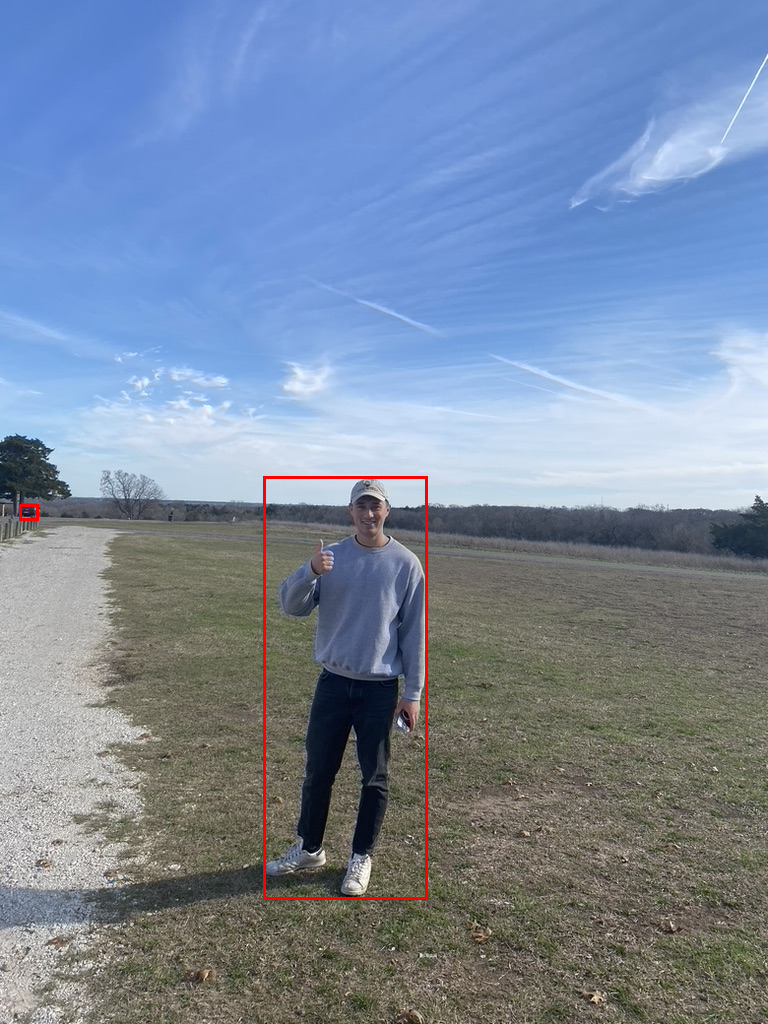

In [14]:
draw = ImageDraw.Draw(image)

for seg in segmentations:
    
    box = seg["box"]
    
    x1, y1, x2, y2 = box["xmin"], box["ymin"], box["xmax"], box["ymax"]
    
    draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=3)

image

#### Speech Recognition

In [15]:
def detect_speech(file_name:str, model_name:str="facebook/wav2vec2-base-960h") -> List[Dict[str, str]]:
    
    return request_hf_api_inference(file_name, model_name)

In [16]:
detect_speech("../data/audio/mclovin.wav")

{'text': "WALK WITH YOU BOYS WE MAKE IT LOOK EASY WALK WITH YOU BOIS DIAM SON WHERE'D YOU FIND THIS"}